## Praktik Text Similarity and Clustering

- Nama : Emmanuel Mathew Krisna rata
- NPM : 200710530

Inisialisasi

In [16]:
from normalizations import normalize_corpus
from utils import build_feature_matrix
import numpy as np

In [6]:
toy_corpus = ['The sky is blue',
              'The sky is blue and beautiful',
              'Look at the bright blue sky!',
              'Python is a great Programming language',
              'Python and Java are popular Programming languages',
              'Among Programming languages, both Python and Java are the most used in Analytics',
              'The fox is quicker than the lazy dog',
              'The dog is smarter than the fox',
              'The dog, fox and cat are good friends']

In [17]:
query_docs = ['The fox is definitely smarter than the dog',
'Java is a static typed programming language unlike Python',
'I love to relax under the beautiful blue sky!']

In [18]:
# Normalization and feature extraction from toy_corpus
norm_corpus = normalize_corpus(toy_corpus, lemmatize=True)
tfidf_vectorizer, tfidf_features = build_feature_matrix(norm_corpus,
                                                        feature_type='tfidf',
                                                        ngram_range=(1, 1),
                                                        min_df=0.0,
                                                        max_df=1.0)

# Normalization and feature extraction from query_docs
norm_query_docs = normalize_corpus(query_docs, lemmatize=True)
query_docs_tfidf = tfidf_vectorizer.transform(norm_query_docs)

Cosine Similarity

In [19]:
def compute_cosine_similarity(doc_features, corpus_features, top_n=3):
    # mengambil vektor dokumen
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()

    # mengecek kesamaan
    similarity = np.dot(doc_features, corpus_features.T)

    # mengambil index dokumen di toy_corpus yang memiliki
    # kesamaan tertinggi di tiap index query_docs
    top_docs = similarity.argsort()[::-1][:top_n]
    top_docs_with_score = [(index, round(similarity[index], 3)) for index in top_docs]

    return top_docs_with_score

In [20]:
print('Document Similarity Analysis using Cosine Similarity')
print('=' * 60)
for index, doc in enumerate(query_docs):
    doc_tfidf = query_docs_tfidf[index]
    top_similar_docs = compute_cosine_similarity(doc_tfidf, tfidf_features, top_n=2)
    print('Document', index + 1, ':', doc)
    print('Top', len(top_similar_docs), 'similar docs:')
    print('-' * 40)
    for doc_index, sim_score in top_similar_docs:
        print('Doc num: {} Similarity Score: {}\nDoc: {}'.format(doc_index + 1, sim_score, toy_corpus[doc_index]))
        print('-' * 40)



Document Similarity Analysis using Cosine Similarity
Document 1 : The fox is definitely smarter than the dog
Top 2 similar docs:
----------------------------------------
Doc num: 8 Similarity Score: 1.0
Doc: The dog is smarter than the fox
----------------------------------------
Doc num: 7 Similarity Score: 0.426
Doc: The fox is quicker than the lazy dog
----------------------------------------
Document 2 : Java is a static typed programming language unlike Python
Top 2 similar docs:
----------------------------------------
Doc num: 5 Similarity Score: 0.733
Doc: Python and Java are popular Programming languages
----------------------------------------
Doc num: 6 Similarity Score: 0.58
Doc: Among Programming languages, both Python and Java are the most used in Analytics
----------------------------------------
Document 3 : I love to relax under the beautiful blue sky!
Top 2 similar docs:
----------------------------------------
Doc num: 2 Similarity Score: 1.0
Doc: The sky is blue and

Document Clustering

In [21]:
import pandas as pd
import numpy as np

In [22]:
movie_data = pd.read_csv('movie_data.csv')
movie_data.head()

,Title,Synopsis
0,The Godfather,"In late summer 1945, guests are gathered for t..."
1,The Shawshank Redemption,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,Schindler's List,The relocation of Polish Jews from surrounding...
3,Raging Bull,"The film opens in 1964, where an older and fat..."
4,Casablanca,"In the early years of World War II, December 1..."


In [23]:
movie_titles = movie_data.iloc[:,0]
movie_synopses = movie_data.iloc[:,1]
print("Movie: ", movie_titles[0])
print("\n")
print("Movie Synopsis: ", movie_synopses[0][:1000])

Movie:  The Godfather


Movie Synopsis:  In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relationship the Don uses to extract new loyalty from the undertake

Text Normalization

In [25]:
from normalizations import normalize_corpus
from utils import build_feature_matrix

# Normalize movie synopses
norm_movie_synopses = normalize_corpus(movie_synopses, lemmatize=True, only_text_chars=True)

# Build TF-IDF feature matrix
vectorizer, feature_matrix = build_feature_matrix(
    norm_movie_synopses,
    feature_type='tfidf',
    min_df=0.24,
    max_df=0.85,
    ngram_range=(1, 2)
)


In [28]:
print(feature_matrix.shape)

(100, 308)


In [31]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

['able' 'across' 'act' 'agree' 'alive' 'allow' 'alone' 'along' 'already'
 'although' 'always' 'another' 'anything' 'apartment' 'appear' 'approach'
 'arm' 'army' 'around' 'arrest']


In [32]:
from sklearn.cluster import KMeans

def k_means(feature_matrix, num_clusters=5):
    km = KMeans(n_clusters=num_clusters, max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters


In [33]:
num_clusters = 5

In [35]:
# Perform clustering using the previously defined function
km_obj, clusters = k_means(feature_matrix=feature_matrix,
num_clusters=num_clusters)

# Add a 'Cluster' column to the movie_data DataFrame
movie_data['Cluster'] = clusters


/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f91f0db3380>
Traceback (most recent call last):
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    sel

In [36]:
movie_data

,Title,Synopsis,Cluster
0,The Godfather,"In late summer 1945, guests are gathered for t...",3
1,The Shawshank Redemption,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0
2,Schindler's List,The relocation of Polish Jews from surrounding...,2
3,Raging Bull,"The film opens in 1964, where an older and fat...",1
4,Casablanca,"In the early years of World War II, December 1...",1
...,...,...,...
95,Rebel Without a Cause,Shortly after moving to Los Angeles with his p...,3
96,Rear Window,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...",0
97,The Third Man,"Sights of Vienna, Austria, flash across the sc...",0
98,North by Northwest,"At the end of an ordinary work day, advertisin...",0


In [37]:
from collections import Counter
c = Counter(clusters)
print(c.items())

dict_items([(3, 22), (0, 36), (2, 16), (1, 18), (4, 8)])


In [38]:
def get_cluster_data(clustering_obj, movie_data, feature_names, num_clusters, topn_features=10):
    cluster_details = {}  # Create a dictionary
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]

    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num

        # Extract key features for the cluster
        key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features

        # Extract movies belonging to the cluster
        movies = movie_data[movie_data['Cluster'] == cluster_num]['Title'].values.tolist()
        cluster_details[cluster_num]['movies'] = movies

    return cluster_details


In [39]:
def print_cluster_data(cluster_data):
    # Print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print('Cluster {} details:'.format(cluster_num))
        print('-' * 20)
        print('Key features:', cluster_details['key_features'])
        print('Movies in this cluster:')
        print(', '.join(cluster_details['movies']))
        print('=' * 40)


In [40]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.matplotlib_fname()
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np

def plot_clusters(num_clusters, feature_matrix, cluster_data, movie_data, plot_size=(16, 8)):
    # generate random color for clusters
    def generate_random_color():
        color = '#%06x' % random.randint(0, 0xFFFFFF)
        return color

    # define markers for clusters
    markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']

    # build cosine distance matrix
    cosine_distance = 1 - cosine_similarity(feature_matrix)

    # dimensionality reduction using MDS
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    # get coordinates of clusters in new low-dimensional space
    plot_positions = mds.fit_transform(cosine_distance)
    x_pos, y_pos = plot_positions[:, 0], plot_positions[:, 1]

    # build cluster plotting data
    cluster_color_map = {}
    cluster_name_map = {}

    for cluster_num, cluster_details in cluster_data.items():
        # assign cluster features to unique label
        cluster_color_map[cluster_num] = generate_random_color()
        cluster_name_map[cluster_num] = ', '.join(cluster_details['key_features'][:5]).strip()

    # map each unique cluster label with its coordinates and movies
    cluster_plot_frame = pd.DataFrame({
        'x': x_pos,
        'y': y_pos,
        'label': movie_data['Cluster'].values.tolist(),
        'title': movie_data['Title'].values.tolist()
    })

    grouped_plot_frame = cluster_plot_frame.groupby('label')

    # set plot figure size and axes
    fig, ax = plt.subplots(figsize=plot_size)
    ax.margins(0.05)

    # plot each cluster using co-ordinates and movie titles
    for cluster_num, cluster_frame in grouped_plot_frame:
        marker = markers[cluster_num] if cluster_num < len(markers) else np.random.choice(markers, size=1)[0]
        ax.plot(cluster_frame['x'], cluster_frame['y'],
                marker=marker, linestyle='', ms=12,
                label=cluster_name_map[cluster_num],
                color=cluster_color_map[cluster_num], mec='none')

    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

    fontP = FontProperties()
    fontP.set_size('small')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01),
              fancybox=True, shadow=True, ncol=5, numpoints=1, prop=fontP)

    # add labels as the film titles
    for index in range(len(cluster_plot_frame)):
        ax.text(cluster_plot_frame.iloc[index]['x'],
                cluster_plot_frame.iloc[index]['y'],
                cluster_plot_frame.iloc[index]['title'], size=8)

    # show the plot
    plt.show()


In [41]:
cluster_data = get_cluster_data(clustering_obj=km_obj, 
                                movie_data=movie_data,
                                feature_names=feature_names,
                                num_clusters=num_clusters,
                                topn_features=5)


In [42]:
print_cluster_data(cluster_data)

Cluster 0 details:
--------------------
Key features: ['car', 'room', 'talk', 'house', 'man']
Movies in this cluster:
The Shawshank Redemption, Citizen Kane, Titanic, Psycho, Sunset Blvd., Vertigo, On the Waterfront, Star Wars, E.T. the Extra-Terrestrial, 2001: A Space Odyssey, Singin' in the Rain, It's a Wonderful Life, Some Like It Hot, 12 Angry Men, Rocky, To Kill a Mockingbird, My Fair Lady, The Exorcist, The French Connection, It Happened One Night, Mr. Smith Goes to Washington, Annie Hall, Tootsie, Fargo, The Green Mile, Close Encounters of the Third Kind, Nashville, The Graduate, American Graffiti, Pulp Fiction, The Maltese Falcon, A Clockwork Orange, Taxi Driver, Rear Window, The Third Man, North by Northwest
Cluster 1 details:
--------------------
Key features: ['soldier', 'kill', 'men', 'shoot', 'fight']
Movies in this cluster:
Raging Bull, Casablanca, West Side Story, The Bridge on the River Kwai, Gandhi, From Here to Eternity, Saving Private Ryan, Unforgiven, Raiders of the

/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


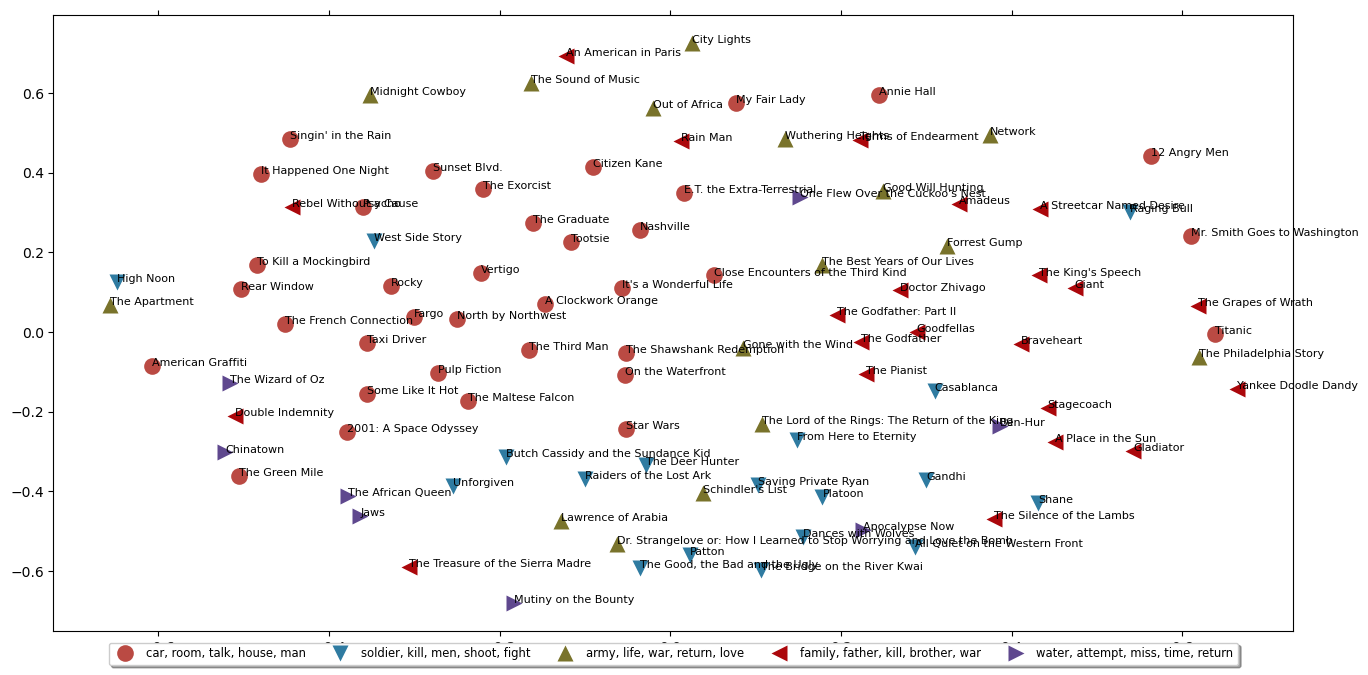

In [43]:
plot_clusters(num_clusters=num_clusters,
              feature_matrix=feature_matrix,
              cluster_data=cluster_data,
              movie_data=movie_data,
              plot_size=(16, 8))


 Hierarchical Clustering

In [44]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import nltk

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

stop_words = nltk.corpus.stopwords.words('english')
stop_words += ['one', 'two', 'get']

cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_movie_synopses)
cv_matrix_shape = cv_matrix.shape

print(cv_matrix_shape)


(100, 955)


Calculate Linkage Matrix using Cosine Similarity

In [46]:
def ward_hierarchical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

Plot Hierarchical Structure as a Dendrogram

In [47]:
def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8, 12)):
    # Set size
    fig, ax = plt.subplots(figsize=figure_size)
    movie_titles = movie_data['Title'].values.tolist()

    # Plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                   truncate_mode='lastp', p=p, no_plot=True)

    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}

    def llf(xx):
        return "{}".format(temp[xx])

    ax = dendrogram(linkage_matrix, truncate_mode='lastp', orientation="left", p=p,
                    leaf_label_func=llf, leaf_font_size=10.)

    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierarchical_clusters.png', dpi=200)
    plt.show() 

In [48]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

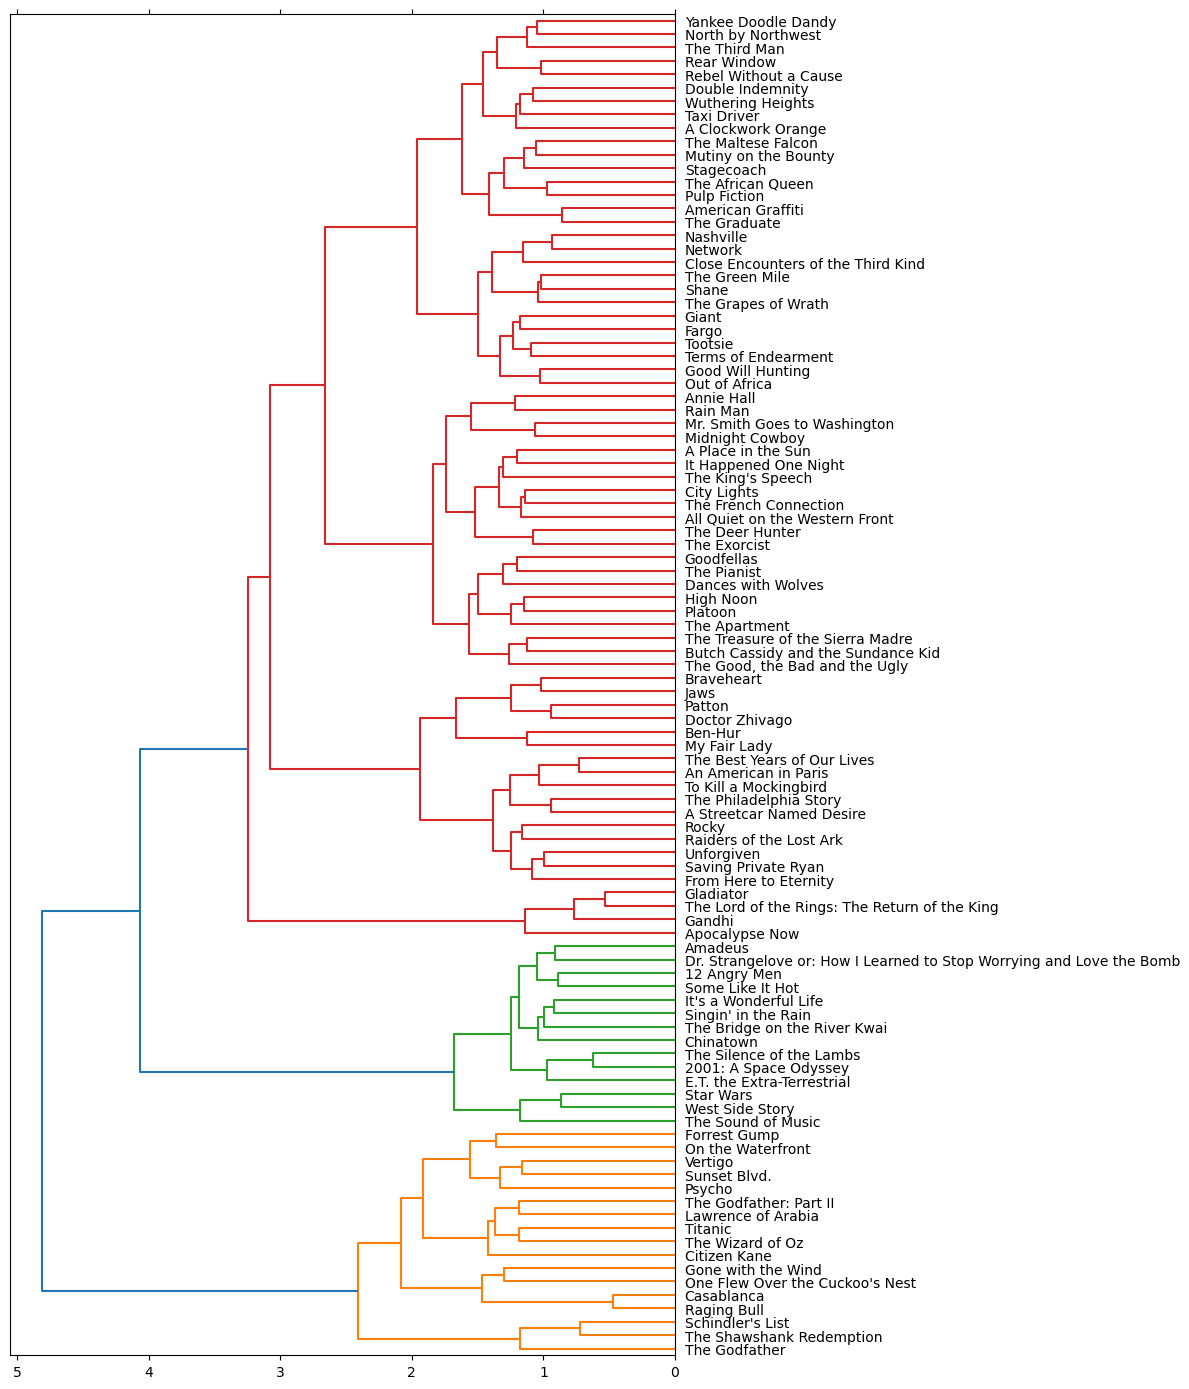

In [49]:
plot_hierarchical_clusters(linkage_matrix=linkage_matrix,
                            p=100,
                            movie_data=movie_data,
                            figure_size=(12, 14))
